In [1]:
import io
import os
import platform
import pdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import preprocessing

In [2]:
data=pd.read_csv('./Hamilton.csv')
data.replace(9999,np.nan,inplace=True)
data.replace(-999,np.nan,inplace=True)
# data.fillna(np.mean(data),inplace=True)
data[95:110]

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),SO2,NO,NO2,NOx,CO,O3,PM25
95,-3.5,-8.0,71.0,29.0,19.0,100.09,0.0,0.0,4.0,4.0,0.16,30.0,3.0
96,-4.5,-9.2,70.0,28.0,19.0,100.23,0.0,0.0,4.0,4.0,0.16,32.0,3.0
97,-5.4,-7.7,84.0,26.0,19.0,100.37,0.0,0.0,3.0,3.0,0.16,35.0,3.0
98,-5.4,-11.0,65.0,27.0,20.0,100.49,0.0,0.0,3.0,3.0,0.16,34.0,3.0
99,-6.7,-10.8,73.0,26.0,22.0,100.67,0.0,0.0,3.0,3.0,0.16,35.0,4.0
100,-7.8,-13.1,66.0,27.0,25.0,100.78,0.0,0.0,3.0,3.0,0.16,36.0,4.0
101,-8.6,-15.3,58.0,27.0,26.0,100.88,0.0,0.0,4.0,4.0,0.16,35.0,5.0
102,-9.4,-14.8,65.0,27.0,27.0,100.97,0.0,0.0,5.0,5.0,0.16,34.0,4.0
103,-10.5,-16.4,62.0,27.0,21.0,101.09,0.0,1.0,6.0,7.0,0.17,33.0,4.0
104,-11.2,-17.8,59.0,26.0,22.0,101.25,0.0,1.0,6.0,8.0,0.19,33.0,4.0


In [3]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        if np.isnan(data.iat[i,j]):
            if i==0:
                data.iloc[i,j]=data.iat[i+1,j]
            elif i==len(data)-1:
                data.iloc[i,j]=data.iat[i-1,j]
            else:
                data.iloc[i,j]=np.nanmean([data.iat[i-1,j],data.iat[i+1,j]])

In [4]:
data.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),SO2,NO,NO2,NOx,CO,O3,PM25
0,-7.4,-15.4,53.0,26.0,16.0,100.35,0.0,1.0,7.0,8.0,0.16,25.0,6.0
1,-7.3,-15.3,53.0,25.0,12.0,100.26,0.0,1.0,6.0,7.0,0.17,26.0,6.0
2,-7.1,-14.6,55.0,24.0,15.0,100.24,0.0,1.0,6.0,6.0,0.17,24.0,7.0
3,-6.8,-13.7,58.0,25.0,15.0,100.25,0.0,1.0,5.0,6.0,0.18,23.0,7.0
4,-6.5,-13.0,60.0,25.0,13.0,100.22,0.0,1.0,6.0,7.0,0.18,23.0,7.0


In [5]:
dataset=pd.DataFrame(data,columns=data.columns[:])
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(dataset) 
dataset.loc[:,:] = scaled_values

In [6]:
data.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),SO2,NO,NO2,NOx,CO,O3,PM25
0,0.317666,0.285974,0.447059,0.722222,0.50000,0.530756,0.0,0.003802,0.103448,0.022508,0.115942,0.320513,0.090909
1,0.319287,0.287796,0.447059,0.694444,0.37500,0.514938,0.0,0.003802,0.086207,0.019293,0.123188,0.333333,0.090909
2,0.322528,0.300546,0.470588,0.666667,0.46875,0.511424,0.0,0.003802,0.086207,0.016077,0.123188,0.307692,0.106061
3,0.327391,0.316940,0.505882,0.694444,0.46875,0.513181,0.0,0.003802,0.068966,0.016077,0.130435,0.294872,0.106061
4,0.332253,0.329690,0.529412,0.694444,0.40625,0.507909,0.0,0.003802,0.086207,0.019293,0.130435,0.294872,0.106061


In [7]:
data_set=np.asarray(dataset,dtype=np.float32)
seq_len=30 + 1
x=len(data_set)-seq_len
sequences = [data_set[t:t+seq_len] for t in range(x)]
seq=torch.FloatTensor(sequences)

In [8]:
seq.shape

torch.Size([17513, 31, 13])

In [9]:
split_row=round(0.90*seq.size(0))
x_train_set=seq[:split_row, :-1]
y_train_set=seq[:split_row, -1]
x_valid_set=seq[split_row:, :-1]
y_valid_set=seq[split_row:, -1]

In [10]:
x_valid_set.shape

torch.Size([1751, 30, 13])

In [11]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers=1,dropout=0,bidirectional=False):
        super(LSTM,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.dropout=dropout
        self.bidirectional=bidirectional
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            dropout=dropout,
                            bidirectional=bidirectional)
        self.linear = nn.Linear(hidden_size, 13)
        
    def forward(self,inputs,hidden):
        outputs,hidden=self.lstm(inputs,hidden)
        predictions=self.linear(outputs[-1])
        return predictions,outputs,hidden
    
    def init_hidden(self,batch_size):
        num_directions=2 if self.bidirectional else 1
        hidden = (torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size),
                  torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size))
        return hidden

In [12]:
def get_batch(x,y,i,batch_size):
    if x.dim() == 2:
        x = x.unsqueeze(2)
    batch_x = x[(i*batch_size):(i*batch_size)+batch_size, :, :]
    batch_y = y[(i*batch_size):(i*batch_size)+batch_size]

    # Reshape Tensors into (seq_len, batch_size, input_size) format for the LSTM.
    batch_x = batch_x.transpose(0, 1)
    
    return batch_x, batch_y

In [13]:
def train(model,x_train_set,y_train_set,optimizer,batch_size,epoch):
    num_sequences=x_train_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.train()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_train_set, y_train_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data
        
    print("Epoch {}: Loss = {:.8f}".format(epoch+1, total_loss/num_batches))
    return total_loss/num_batches,y_pred[-1]

In [14]:
def eval(model,x_valid_set,y_valid_set,optimizer,batch_size):
    num_sequences=x_valid_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.eval()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_valid_set, y_valid_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data

    print("Validation: Loss = {:.8f}".format(total_loss/num_batches))
    return total_loss/num_batches,y_pred[-1]

In [15]:
def save_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    torch.save(model.state_dict(), filename)
    
    
    return model

In [16]:
def load_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    model.load_state_dict(torch.load(filename))
    
    
    return model

Training model for 30 epoch
Epoch 1: Loss = 0.01681050
Validation: Loss = 0.00774342
Epoch 2: Loss = 0.00736943
Validation: Loss = 0.00549426
Epoch 3: Loss = 0.00627372
Validation: Loss = 0.00507773
Epoch 4: Loss = 0.00587789
Validation: Loss = 0.00479409
Epoch 5: Loss = 0.00562017
Validation: Loss = 0.00460763
Epoch 6: Loss = 0.00544693
Validation: Loss = 0.00447443
Epoch 7: Loss = 0.00531273
Validation: Loss = 0.00436567
Epoch 8: Loss = 0.00520639
Validation: Loss = 0.00427955
Epoch 9: Loss = 0.00512377
Validation: Loss = 0.00420370
Epoch 10: Loss = 0.00505533
Validation: Loss = 0.00413320
Epoch 11: Loss = 0.00499984
Validation: Loss = 0.00408063
Epoch 12: Loss = 0.00495848
Validation: Loss = 0.00404487
Epoch 13: Loss = 0.00492583
Validation: Loss = 0.00401902
Epoch 14: Loss = 0.00489955
Validation: Loss = 0.00399891
Epoch 15: Loss = 0.00488005
Validation: Loss = 0.00398310
Epoch 16: Loss = 0.00486360
Validation: Loss = 0.00397073
Epoch 17: Loss = 0.00484937
Validation: Loss = 0.0039

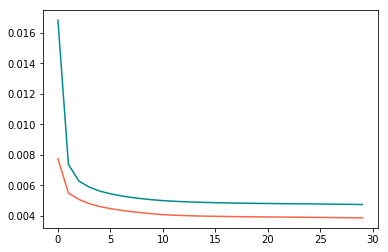

In [21]:
input_size=13
hidden_size=24
num_layers=2
lstm=LSTM(input_size,hidden_size,num_layers)

learning_rate=0.001
max_grad_norm=5
loss_fn = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate,weight_decay=0.00001)

batch_size = 8
num_epochs = 30 #3
# num_sequences = x_train_set.size(0)
# num_batches = num_sequences //batch_size

checkpoint_freq = 10
path = './'

train_losses=[]
valid_losses=[]

print("Training model for {} epoch".format(num_epochs))
for epoch in range(num_epochs):
#     total_loss = 0

    # Shuffle input and target sequences.
    idx = torch.randperm(x_train_set.size(0))
    x = x_train_set[idx]
    y = y_train_set[idx]
    
    train_loss,train_pm25=train(lstm,x_train_set,y_train_set,optimizer,batch_size,epoch)
    valid_loss,valid_pm25=eval(lstm,x_valid_set,y_valid_set,optimizer,batch_size)
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    # Checkpoint
    if epoch % checkpoint_freq ==0:
        save_model(epoch, lstm, path)
        
# Last checkpoint
save_model(num_epochs, lstm, path)
    
print("\n\n\nOptimization ended.\n")

plt.plot(train_losses, color="darkcyan", label="train")
plt.plot(valid_losses, color="tomato",label="validation")
plt.show()

In [22]:
def predict_one_hour(model,x_valid_set,input_size,num_steps):
    predictions=torch.zeros(num_steps)
    for i, x in enumerate(x_valid_set):
        hidden=model.init_hidden(1)
        y_pred,_,_=model(x.contiguous().view(-1, 1, input_size),hidden)
        predictions[i]=y_pred[:,-1]
    return predictions

In [23]:
one_step_predictions = predict_one_hour(lstm, x_valid_set, input_size, y_valid_set.size(0))

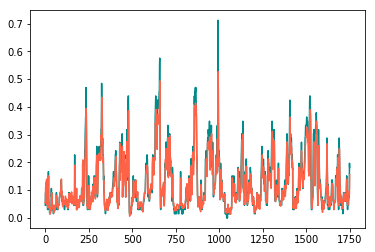

In [24]:
plt.plot(y_valid_set[:,-1].data.numpy(),color='darkcyan')
plt.plot(one_step_predictions.data.numpy(),color='tomato')
plt.show()